<a href="https://colab.research.google.com/github/SiracencoSerghei/Statistics_and_ML/blob/main/2.8_correlation/stats_corr_Spearman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION: Correlation
# Spearman correlation and Fisher-Z

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

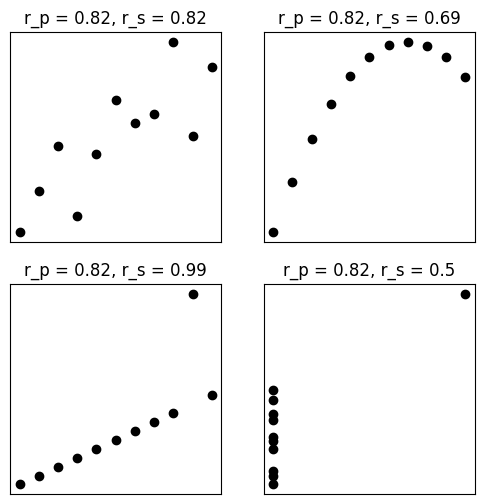

In [9]:
## Anscobe's quartet

anscombe = np.array([
     # series 1     series 2      series 3       series 4
    [10,  8.04,    10,  9.14,    10,  7.46,      8,  6.58, ],
    [ 8,  6.95,     8,  8.14,     8,  6.77,      8,  5.76, ],
    [13,  7.58,    13,  8.76,    13, 12.74,      8,  7.71, ],
    [ 9,  8.81,     9,  8.77,     9,  7.11,      8,  8.84, ],
    [11,  8.33,    11,  9.26,    11,  7.81,      8,  8.47, ],
    [14,  9.96,    14,  8.10,    14,  8.84,      8,  7.04, ],
    [ 6,  7.24,     6,  6.13,     6,  6.08,      8,  5.25, ],
    [ 4,  4.26,     4,  3.10,     4,  5.39,      8,  5.56, ],
    [12, 10.84,    12,  9.13,    12,  8.15,      8,  7.91, ],
    [ 7,  4.82,     7,  7.26,     7,  6.42,      8,  6.89, ],
    [ 5,  5.68,     5,  4.74,     5,  5.73,     19, 12.50, ]
    ])

# Create a 2x2 grid for the subplots, setting figure size
fig, ax = plt.subplots(2, 2, figsize=(6, 6))

# Flatten the 2x2 array of axes to make indexing easier
ax = ax.ravel()

# Loop through each dataset in Anscombe's quartet
for i in range(4):
    # Plot x vs. y for the i-th dataset as black circles
    ax[i].plot(anscombe[:, i*2], anscombe[:, i*2+1], 'ko')

    # Remove x and y ticks for a cleaner look
    ax[i].set_xticks([])
    ax[i].set_yticks([])

    # Calculate Pearson and Spearman correlations
    corr_p = stats.pearsonr(anscombe[:, i*2], anscombe[:, i*2+1])[0]
    corr_s = stats.spearmanr(anscombe[:, i*2], anscombe[:, i*2+1])[0]

    # Set the title with rounded Pearson and Spearman correlation values
    ax[i].set_title('r_p = %g, r_s = %g' % (np.round(corr_p * 100) / 100, np.round(corr_s * 100) / 100))

# Display the plots
plt.show()

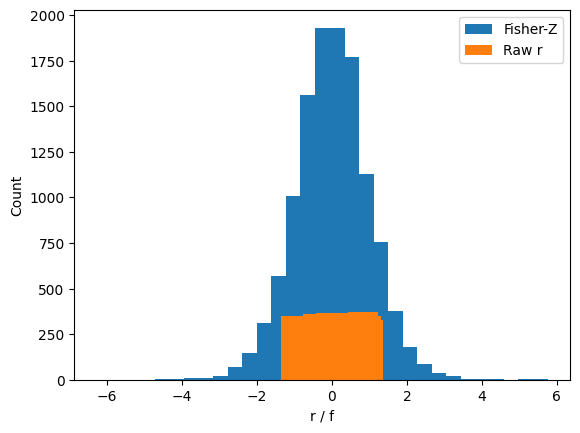

In [10]:
## Fisher-Z transform


# simulate correlation coefficients
N = 10000
r = 2*np.random.rand(N) - 1

# Fisher-Z
fz = np.arctanh(r)



# overlay the Fisher-Z
y,x = np.histogram(fz,30)
x = (x[1:]+x[0:-1])/2
plt.bar(x,y)

# raw correlations
y,x = np.histogram(r,30)
x = (x[1:]+x[0:-1])/2
plt.bar(x,y)


plt.xlabel('r / f')
plt.ylabel('Count')
plt.legend(('Fisher-Z','Raw r'))

plt.show()

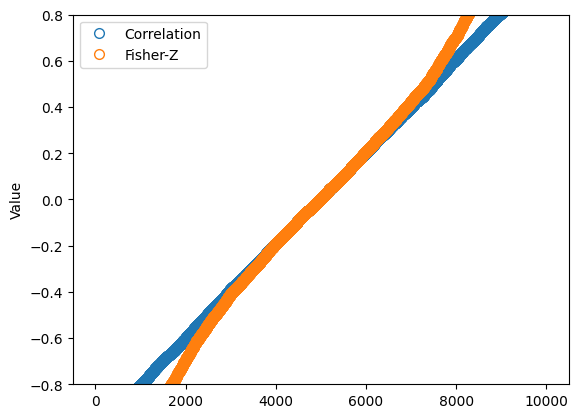

In [13]:
plt.plot(range(N),np.sort(r), 'o',markerfacecolor='w',markersize=7)
plt.plot(range(N),np.sort(fz),'o',markerfacecolor='w',markersize=7)
plt.ylabel('Value')
plt.legend(('Correlation','Fisher-Z'))

# zoom in
plt.ylim([-.8,.8])
plt.show()

---
Spearman correlation
---

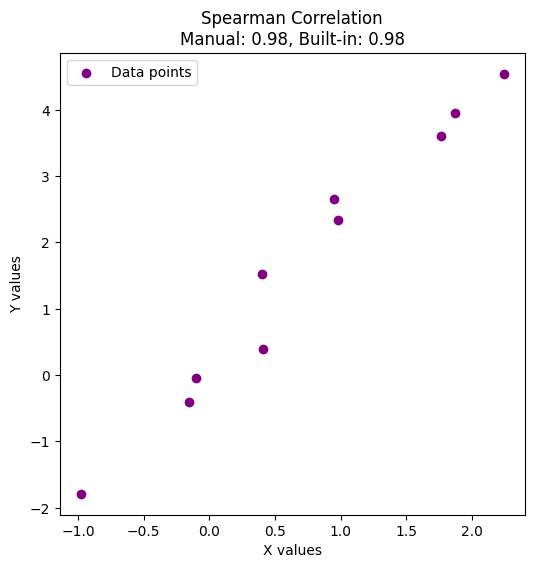

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Generate two random variables
np.random.seed(0)
x = np.random.normal(0, 1, 10)
y = 2 * x + np.random.normal(0, 0.5, 10)  # Create a variable with some correlation to x

# Step 2: Rank the data for Spearman calculation
rank_x = stats.rankdata(x)
rank_y = stats.rankdata(y)

# Step 3: Calculate the differences between ranks
d = rank_x - rank_y
d_squared_sum = np.sum(d**2)
n = len(x)

# Step 4: Calculate Spearman correlation manually
rho_manual = 1 - (6 * d_squared_sum) / (n * (n**2 - 1))

# Step 5: Calculate Spearman correlation using scipy's built-in function
rho_builtin, _ = stats.spearmanr(x, y)

# Step 6: Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(x, y, color="purple", label="Data points")
plt.title(f"Spearman Correlation\nManual: {rho_manual:.2f}, Built-in: {rho_builtin:.2f}")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.show()


Pearson's correlation on rank-transformed data: 0.891860744297719
Spearman rank correlation: 0.8918607442977191


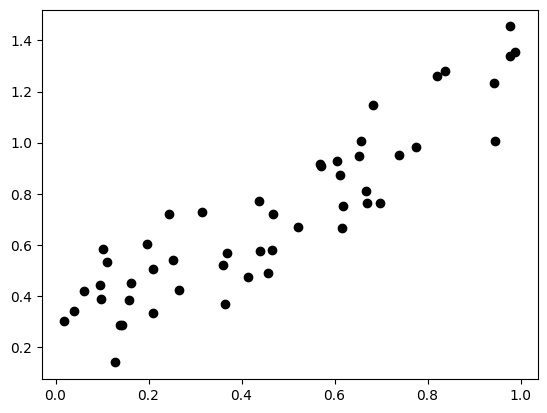

In [15]:
N = 50
x = np.random.rand(N)
y = x + np.random.rand(N) * 0.5
plt.plot(x, y,'ko')

from scipy.stats import rankdata
x_rank = rankdata(x, method='ordinal')
y_rank = rankdata(y, method='ordinal')

corr_p = stats.pearsonr(x_rank, y_rank)[0]
corr_s = stats.spearmanr(x, y)[0]

print("Pearson's correlation on rank-transformed data:", corr_p)
print("Spearman rank correlation:", corr_s)

---
Confidance interval on correlation
---

Original Pearson correlation: 0.859
95% Confidence Interval for Pearson correlation: (0.801, 0.900)


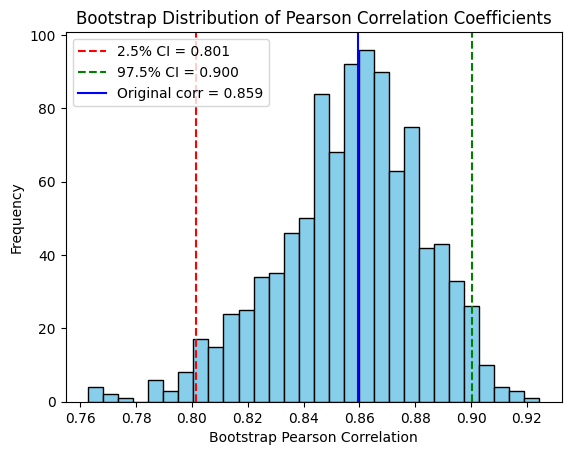

In [16]:

# Step 1: Generate correlated data with n=100
np.random.seed(0)
n = 100
x = np.random.normal(0, 1, n)
y = 0.8 * x + np.random.normal(0, 0.5, n)  # Adding noise to create a correlation

# Step 2: Compute the actual correlation coefficient
corr, _ = stats.pearsonr(x, y)  # Using Pearson as an example
print(f"Original Pearson correlation: {corr:.3f}")

# Step 3: Bootstrap to compute 95% CI
num_bootstraps = 1000
bootstrapped_corrs = []

for _ in range(num_bootstraps):
    # Resample with replacement
    indices = np.random.choice(range(n), size=n, replace=True)
    x_boot = x[indices]
    y_boot = y[indices]

    # Calculate correlation in each bootstrap sample
    boot_corr, _ = stats.pearsonr(x_boot, y_boot)
    bootstrapped_corrs.append(boot_corr)

# Convert list to array for easier percentile calculations
bootstrapped_corrs = np.array(bootstrapped_corrs)

# Step 4: Calculate the 95% confidence interval
ci_lower = np.percentile(bootstrapped_corrs, 2.5)
ci_upper = np.percentile(bootstrapped_corrs, 97.5)
print(f"95% Confidence Interval for Pearson correlation: ({ci_lower:.3f}, {ci_upper:.3f})")

# Step 5: Plot the distribution of bootstrapped correlations
plt.hist(bootstrapped_corrs, bins=30, color='skyblue', edgecolor='black')
plt.axvline(ci_lower, color='red', linestyle='--', label=f'2.5% CI = {ci_lower:.3f}')
plt.axvline(ci_upper, color='green', linestyle='--', label=f'97.5% CI = {ci_upper:.3f}')
plt.axvline(corr, color='blue', label=f'Original corr = {corr:.3f}')
plt.xlabel("Bootstrap Pearson Correlation")
plt.ylabel("Frequency")
plt.legend()
plt.title("Bootstrap Distribution of Pearson Correlation Coefficients")
plt.show()

In [19]:

N = 1500
confidence = 95
bootscorr = np.zeros(N)

# Generate two correlated datasets
x = np.random.randn(N)
y = np.random.randn(N)
r = 0.7
y = x * r + y * np.sqrt(1 - r**2)

# Calculate original Pearson correlation
corr = stats.pearsonr(x, y)[0]
print(f"Original Pearson correlation: {corr:.3f}")

# Bootstrap resampling
for i in range(N):
    random_index = np.random.choice(np.arange(N), N, replace=True)
    bootscorr[i] = stats.pearsonr(x[random_index], y[random_index])[0]

# Calculate 95% confidence intervals
confint = [
    np.percentile(bootscorr, (100 - confidence) / 2),
    np.percentile(bootscorr, 100 - (100 - confidence) / 2)
]

print(f"95% Confidence Interval for Pearson correlation: {confint}")



Original Pearson correlation: 0.681
95% Confidence Interval for Pearson correlation: [0.653980827539792, 0.7090836878526187]


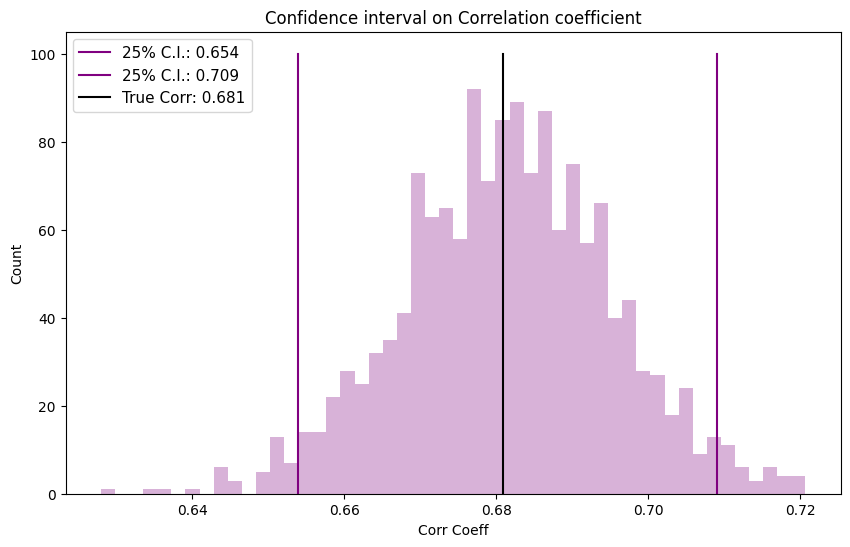

In [20]:
plt.figure(figsize=(10,6))
plt.hist(bootscorr, 50, color='purple', alpha=0.3)
plt.plot([confint[0], confint[0]], [0,100],'purple',label=f'25% C.I.: {round(confint[0],3)}')
plt.plot([confint[1], confint[1]], [0,100],'purple',label=f'25% C.I.: {round(confint[1],3)}')
plt.plot([corr,corr], [0,100], 'black', label=f'True Corr: {round(corr,3)}')
plt.legend(fontsize = 11)
plt.title('Confidence interval on Correlation coefficient')
plt.xlabel('Corr Coeff')
plt.ylabel('Count')
plt.axis('tight')
plt.show()
